In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math

<h1>CARBON FOOTPRINT</h1>

In [12]:
with open('carbon_txt.txt') as file:
    lines = file.readlines()
rows = lines[0].replace('\t', ' ').replace('\n', '').split(' ')
print(rows)
for line in lines[1:5]:
    print(line)

['year', 'car', 'Highway', 'Carbon', 'Footprint', '(CO2/mile)', 'cyl', 'Hybrid']
2015 Toyota Prius Plug-in Hybrid 1.8 L	48	133	4	Hybrid

2015 Toyota Prius 1.8 L	49	178	4	Hybrid

2015 Honda Accord Hybrid 2.0 L	45	188	4	Hybrid

2015 Ford Fusion Hybrid FWD 2.0 L	41	209	4	Hybrid



In [47]:
with open('carbon_txt.txt') as file:
    lines = file.readlines()
rows = lines[0].split(' ')

table = list()
for line in lines[1:]:
    index = line.rfind('L')
    new_line = [line[:index + 1]] + line[index+1:].strip().replace('\t', ' ').replace('\n', '').split(' ')
    table.append(new_line[1:])

In [48]:
for i, row in enumerate(table):
    if row[3] == 'Hybrid':
        table[i][3] = '0'
    else:
        table[i][3]= '1'
    table[i] = list(map(int, table[i]))

In [49]:
table = np.array(table)

In [51]:
carbon_footprint = table[:, 1]
highway = table[:, 0]

pearson = stats.pearsonr(carbon_footprint, highway)
spearman = stats.spearmanr(carbon_footprint, highway)
kendall = stats.kendalltau(carbon_footprint, highway)

print(pearson)
print(spearman)
print(kendall)

(-0.8604344848880898, 2.707274642143291e-21)
SpearmanrResult(correlation=-0.9428165780420033, pvalue=1.1042993239716671e-33)
KendalltauResult(correlation=-0.8340978642399345, pvalue=8.811283909643456e-23)


In [56]:
carbon_footprint = table[:, 1]
cyl = table[:, 2]

pearson = stats.pearsonr(carbon_footprint, cyl)
spearman = stats.spearmanr(carbon_footprint, cyl)
kendall = stats.kendalltau(carbon_footprint, cyl)

print(pearson)
print(spearman)
print(kendall)

(0.6124965607502011, 2.2319686950551696e-08)
SpearmanrResult(correlation=0.6886527936264031, pvalue=6.149861856610898e-11)
KendalltauResult(correlation=0.5680787531428133, pvalue=1.3566166748112609e-08)


In [57]:
carbon_footprint = table[:, 1]
cyl = table[:, 3]

pearson = stats.pearsonr(carbon_footprint, cyl)
spearman = stats.spearmanr(carbon_footprint, cyl)
kendall = stats.kendalltau(carbon_footprint, cyl)

print(pearson)
print(spearman)
print(kendall)

(0.8000974220512664, 1.6236820250367966e-16)
SpearmanrResult(correlation=0.6774641529500074, pvalue=1.6311987443606862e-10)
KendalltauResult(correlation=0.5588490961899396, pvalue=2.3167485295455085e-08)


In [70]:
lines[0].replace('\n', '').replace('  ', ' ').split(' ')

['42.9',
 '26.0',
 '31.5',
 '17.7',
 '28.0',
 '13.1',
 '10.4',
 '18.8',
 '14.1',
 '106.2',
 '89.5',
 '71.5',
 '74.5',
 '93.5',
 '51.5',
 '32.5',
 '26.0',
 '34.5',
 '36.5',
 '23.5',
 '16.5',
 '21.0',
 '65.6',
 '174.0',
 '1']

<h1>BODY</h1>

In [72]:
with open('body_dat.txt') as f:
    lines = f.readlines()
    
table = list()
for line in lines:
    handled_line = line.replace('\n', '').replace('  ', ' ').split(' ')
    table.append(list(map(float, handled_line)))

In [75]:
table = np.array(table)
table.shape

(507, 25)

In [78]:
pearson_table = np.zeros((25, 25))
spearman_table = np.zeros((25, 25))
kendall_table = np.zeros((25, 25))

In [101]:
for i in range(25):
    for j in range(25):
        data0 = table[:, i]
        data1 = table[:, j]
        pearson = stats.pearsonr(data0, data1)[0]
        spearman = stats.spearmanr(data0, data1)[0]
        kendall = stats.kendalltau(data0, data1)[0]
        pearson_table[i, j] = "{:.2f}".format(pearson)
        spearman_table[i, j] = "{:.2f}".format(spearman)
        kendall_table[i, j] = "{:.2f}".format(kendall)

In [85]:
df2 = pd.DataFrame(pearson_table, columns=list(range(6)))

<AxesSubplot:>

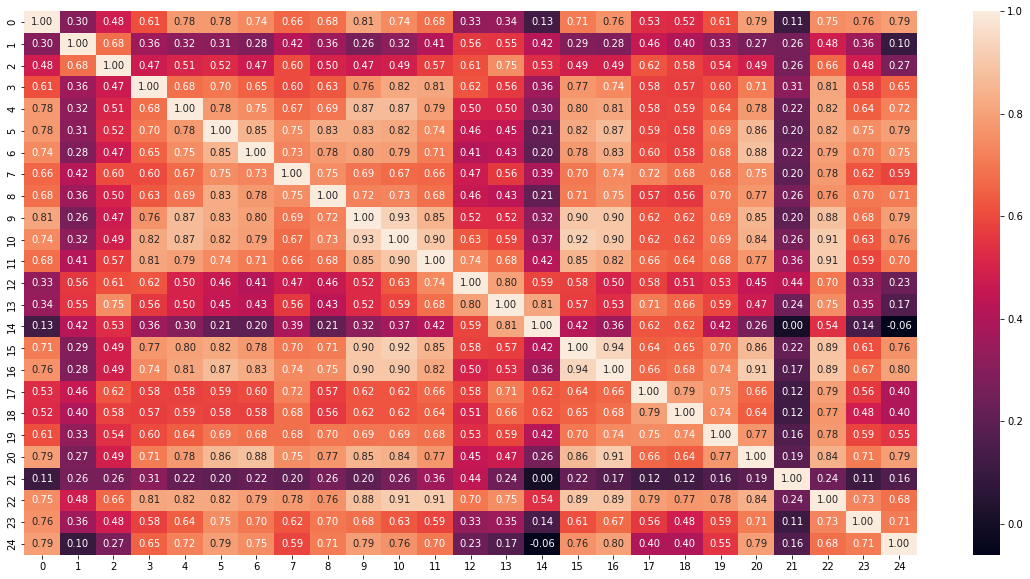

In [89]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [90]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.00,0.31,0.49,0.58,0.77,0.77,0.72,0.64,0.66,0.79,0.72,0.64,0.31,0.34,0.12,0.70,0.75,0.51,0.51,0.60,0.77,0.09,0.73,0.75,0.77
1,0.31,1.00,0.67,0.36,0.33,0.32,0.28,0.44,0.37,0.28,0.33,0.43,0.58,0.56,0.41,0.30,0.29,0.47,0.41,0.34,0.26,0.25,0.50,0.38,0.12
2,0.49,0.67,1.00,0.47,0.52,0.53,0.47,0.61,0.50,0.48,0.49,0.57,0.62,0.75,0.53,0.48,0.48,0.62,0.59,0.54,0.48,0.27,0.67,0.49,0.26
3,0.58,0.36,0.47,1.00,0.67,0.67,0.61,0.55,0.60,0.74,0.81,0.80,0.62,0.56,0.36,0.73,0.72,0.56,0.55,0.59,0.68,0.32,0.80,0.55,0.61
4,0.77,0.33,0.52,0.67,1.00,0.76,0.73,0.66,0.67,0.87,0.87,0.79,0.50,0.52,0.31,0.79,0.81,0.59,0.60,0.64,0.76,0.19,0.83,0.63,0.70
5,0.77,0.32,0.53,0.67,0.76,1.00,0.84,0.73,0.82,0.82,0.80,0.69,0.44,0.44,0.21,0.80,0.86,0.59,0.58,0.66,0.85,0.20,0.80,0.74,0.77
6,0.72,0.28,0.47,0.61,0.73,0.84,1.00,0.71,0.77,0.78,0.77,0.68,0.40,0.42,0.19,0.76,0.81,0.58,0.58,0.65,0.86,0.21,0.76,0.68,0.73
7,0.64,0.44,0.61,0.55,0.66,0.73,0.71,1.00,0.72,0.68,0.65,0.62,0.47,0.58,0.43,0.68,0.72,0.73,0.69,0.65,0.73,0.17,0.77,0.59,0.54
8,0.66,0.37,0.50,0.60,0.67,0.82,0.77,0.72,1.00,0.69,0.71,0.64,0.44,0.41,0.19,0.69,0.74,0.54,0.54,0.68,0.76,0.24,0.73,0.69,0.69
9,0.79,0.28,0.48,0.74,0.87,0.82,0.78,0.68,0.69,1.00,0.93,0.82,0.52,0.53,0.32,0.90,0.89,0.62,0.63,0.68,0.84,0.18,0.88,0.67,0.78


In [97]:
columns = ['Biacromial diameter', 'pelvic breadth', 'Bitrochanteric diameter', 'Chest depth between spine and sternum at nipple level', 
           'Chest diameter at nipple level', 'Elbow diameter','Wrist diameter', 'Knee diameter', 'Ankle diameter', 
           'Shoulder girth over deltoid muscles', 'Chest girth, nipple line in males and just above breast tissue in females',
           'Waist girth, narrowest part of torso below the rib cage, average of contracted and relaxed position', 
           'Navel (or "Abdominal") girth at umbilicus and iliac crest, iliac crest as a landmark',
           'Hip girth at level of bitrochanteric diameter', 'Thigh girth below gluteal fold, average of right and left girths',
           'Bicep girth, flexed', 'Forearm girth, extended, palm up', 'Knee girth over patella, slightly flexed position', 
           'Calf maximum girth', 'Ankle minimum girth', 'Wrist minimum girth', 'Age', 'Weight', 'Height', 'Gender']
           

In [122]:
data = dict()

for i in range(25):
    for j in range(i + 1, 25):
        data0 = table[:, i]
        data1 = table[:, j]
        spearman = stats.spearmanr(data0, data1)
        kendall = stats.kendalltau(data0, data1)
        
        work_stat = kendall
        
        if abs(work_stat[0]) > 0.75:
            print(f"{columns[i]} and {columns[j]} stat -- {work_stat[0]}, pvalue -- {work_stat[1]}")

Shoulder girth over deltoid muscles and Chest girth, nipple line in males and just above breast tissue in females stat -- 0.7641165796674284, pvalue -- 5.657669096496593e-145
Bicep girth, flexed and Forearm girth, extended, palm up stat -- 0.7994681482321925, pvalue -- 7.896936135461518e-157


In [103]:
from hyppo.independence import Hsic

In [109]:
data = dict()

for i in range(25):
    for j in range(i + 1, 25):
        data0 = table[:, i]
        data1 = table[:, j]
        hsic = Hsic().test(data0, data1)
        
        if hsic.pvalue > 0.7:
            print(f"{columns[i]} and {columns[j]} pvalue -- {hsic.pvalue}, stat -- {hsic.stat}")

Thigh girth below gluteal fold, average of right and left girths and Age pvalue -- 1.0, stat -- -0.00303770145422072
